
# DIABETICS PREDICTION MODEL USING MACHINE LEARNING

Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

Data Collection and Analysis

In [ ]:
diabetes_dataset=pd.read_csv('/content/diabetes.csv')

In [ ]:
pd.read_csv?
#using the above feature we can understand the working of read_csv function

In [ ]:
diabetes_dataset.head()
#using the above function head() we can access and display the first 5 rows of the dataframe diabetes_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_dataset.shape
#the number of rows and columns in the dataset are returned using the shape() function

(768, 9)

In [ ]:
diabetes_dataset.describe()
#this function returns all the statistical data of all the given data per column



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


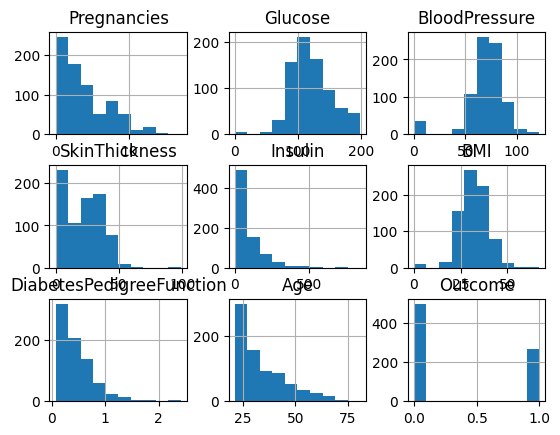

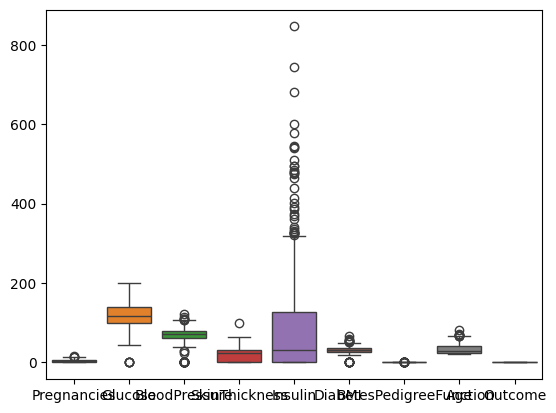

In [ ]:
print("\n\n\n")
# Assuming diabetes_dataset is a pandas DataFrame
# Histograms
diabetes_dataset.hist()
plt.show()
print("\n\n\n")
# Box plots
sns.boxplot(data=diabetes_dataset)
plt.show()

the above mentioned percentge indicate the percentage of data that are present within the range of the given statistical data

In [ ]:
diabetes_dataset['Outcome'].value_counts()
#this function counts the number of data present for each different value in the column 'Outcome'
#in this case "0 represents non-diabetic" and""1 represents diabetic"

Outcome
0    500
1    268
Name: count, dtype: int64

In [ ]:
diabetes_dataset.groupby('Outcome').mean()
#this function will give the mean values of all the columns of data corresponding to the different values present in the 'Outcome' column i.e., it helps to group the datasets based on their labels(here 1 and 0)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
Data = diabetes_dataset.drop(columns='Outcome',axis=1)
Labels=diabetes_dataset['Outcome']
#drop() function is used to remove the required columns and return the necessary dataset

axis=1 for dropping a column
axis=0 for dropping a row

In [ ]:
print(Data)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(Labels)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Dta Standardization

In [ ]:
scaler=StandardScaler()
#this takes one instance of the standard scaler function

In [ ]:
standardized=scaler.fit_transform(Data)
#fit first then transform can also be done seperately
#????

In [ ]:
print(standardized)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
Data=standardized
#Now Data contains the information in standardized and Labels contains the data in column 'Outcome'

In [ ]:
print("Data:")
print(Data)
print("Labels:")
print(Labels)

Data:
[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
Labels:
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64



Train Test Split

In [ ]:
Data_train, Data_test, Labels_train, Labels_test=train_test_split(Data,Labels,test_size=0.2,stratify=Labels,random_state=2)
#test_size refers to the amount of data taken for testing(here it is 20%)
#data is stratified or split based on the values in Labels(i.e.,0 and 1 )

In [ ]:
print(Data.shape,Data_train.shape,Data_test.shape)

(768, 8) (614, 8) (154, 8)


Training the model

In [ ]:
classifier=svm.SVC(kernel='linear')
#svc stands for support vector classifier

In [ ]:
classifier.fit(Data_train,Labels_train)

SVC(kernel='linear')

Model Evaluation

Accuracy Score:

Accuracy Score on training data:

In [ ]:
Data_train_prediction=classifier.predict(Data_train)
training_data_accuracy=accuracy_score(Data_train_prediction,Labels_train)

In [ ]:
print("Accuracy score of training data:",training_data_accuracy)


Accuracy score of training data: 0.7866449511400652


Accuracy Score on test data:

In [ ]:
Data_test_prediction=classifier.predict(Data_test)
test_data_accuracy=accuracy_score(Data_test_prediction,Labels_test)

In [ ]:
print("Accuracy score of test data:",test_data_accuracy)


Accuracy score of test data: 0.7727272727272727


Making a predictive system

In [ ]:
print("Please enter the following information for prediction:")
pregnancies = float(input("Number of pregnancies: "))
glucose = float(input("Plasma glucose concentration: "))
blood_pressure = float(input("Diastolic blood pressure: "))
skin_thickness = float(input("Triceps skin fold thickness: "))
insulin = float(input("2-Hour serum insulin: "))
bmi = float(input("BMI: "))
diabetes_pedigree_function = float(input("Diabetes pedigree function: "))
age = float(input("Age: "))

input_data = (pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree_function, age)
627
506

#convert the given input data to n numpy array
input_array=np.asarray(input_data)
#reshape the array to predict for  single instance
input_data_reshaped=input_array.reshape(1,-1)
#standardize
std_data=scaler.transform(input_data_reshaped)
print("\n\n\nThe array of standardized input data:\n",std_data,"\n\n\n")

print("OUTPUT:")
prediction=classifier.predict(std_data)
print(prediction[0])
if(prediction[0]==0):
  print("\nThe person is not diabetic.\n\n\n")
else:
  print("\nThe person is diabetic\n\n\n")



Please enter the following information for prediction:
Number of pregnancies: 6
Plasma glucose concentration: 148
Diastolic blood pressure: 72
Triceps skin fold thickness: 35
2-Hour serum insulin: 0
BMI: 33.6
Diabetes pedigree function: 0.627
Age: 50



The array of standardized input data:
 [[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]] 



OUTPUT:
1

The person is diabetic





/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
